## Problem 3: Scans
This problem is about a useful computational primitive known as a scan. It has four (4) exercises, which are worth a total of ten (10) points.

By way of set up, the module will revolve around a possibly new function for you called <code>accumulate()</code>, which is available in the <a href="https://docs.python.org/3/library/itertools.html">itertools</a> module. Run the following code cell to preload it.

In [1]:
from itertools import accumulate

SAVE_ACCUMULATE = accumulate # You may ignore this line, which some test cells will use

### Background: Cumulative sums
Consider a sequence of `n` values, `[x0,x1,x2,…,xn−1]`. Its cumulative sum (or running sum) is
```
[x0,x0+x1⏟,x0+x1+x2,…,x0+x1+x2+⋯+xn−1]
```
.

For example, the list
```
[5, 3, -4, 20, 2, 9, 0, -1]
```
has the following cumulative sum:
```
[5, 8, 4, 24, 26, 35, 35, 34]
```
The `accumulate()` function makes it easy to compute cumulative sums.

__Exercise 0__ (1 point). Run the following code cell. (Yes, that's it -- one free point with no coding required!)

In [2]:
L = list(accumulate([5, 3, -4, 20, 2, 9, 0, -1]))
print(L)

print("\n(Passed!)")

[5, 8, 4, 24, 26, 35, 35, 34]

(Passed!)


Note: The `accumulate()` function returns a certain object, which is why `list()` is used to convert its result into a list.

## Scans
A cumulative sum is one example of a more general primitive also known as a <i>scan</i>.

Let $f(x,y)$ be any associative function of two values. Associative means that $f(f(x,y),z)=f(x,f(y,z))$. For example, addition is associative: suppose that $f(x,y)=x+y$; then it is true that $(x+y)+z=x+(y+z)$. The scan of a sequence with respect to $f$ is
$scan([x0,x1,…,xn−1],f)=[]x0,f(x0,x1)f(f(x0,x1),x2)⋮,f(⋯(f(x0,x1),x2),⋯),xn−1)$
 
The `accumulate()` function lets you implement these kinds of scans easily, too. For example, convince yourself that computing the minimum of two values, $min(x,y)$, is also associative. Then you can implement a <i>minimum scan</i>, or <i>min-scan</i> for short, as follows:

__Exercise 1__ (1 point). Run the following cell and make sure its output makes sense to you. (Yes, that's it -- no coding required.)

In [3]:
def min_scan(X):
    return list(accumulate(X, min))

print('min_scan({}) == {}'.format(L, min_scan(L)))

print("\n(Passed!)")

min_scan([5, 8, 4, 24, 26, 35, 35, 34]) == [5, 5, 4, 4, 4, 4, 4, 4]

(Passed!)


__Exercise 2: Line-of-sight__ (3 points). Suppose a camera is fixed at a certain height in front of a bunch of obstacles of varying heights at different locations. You wish to determine all locations in which the camera's view is obstructed.

For example, in this cartoon, the camera's view is obstructed at all positions starting at 8:

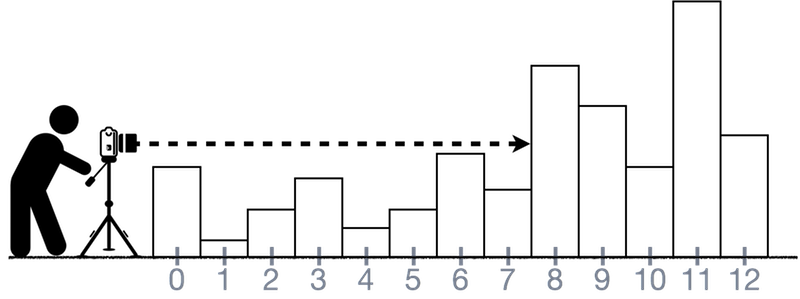

In [4]:
from IPython.display import Image
Image("line-of-sight.png")

Let `h` be the height of the camera and `X` be a list such that `X[i]` is the height of the obstacle at position `i`. Use `accumulate()` to complete the function, `get_obstruction(X, h)`, so that it returns a list of all positions at which the camera is obstructed. (For data corresponding to the above figure, this function would return `[8, 9, 10, 11, 12]`.

An obstacle obstructs the camera if its height is <i>greater than or equal</i> to the height of the camera. For this exercise, your code must use `accumulate()` in some way.

In [5]:
def get_obstruction(X, h):
    X_max = accumulate(X, max)
    return [i for i, x in enumerate(X_max) if x >= h]

In [6]:
# Test cell: `exercise_2_test`

def check_get_obstruction(X, h):
    global accumulate
    print("Testing: h={}, X={}".format(h, X))
    try:
        del accumulate
        pos_test = get_obstruction(X, h)
    except NameError as n:
        if n.args[0] != "name 'accumulate' is not defined":
            raise n
    finally:
        accumulate = SAVE_ACCUMULATE
        
    pos = get_obstruction(X, h)
    print("\t==> Your code reports these positions as 'obstructed': {}".format(pos))
    for i in range(len(X)):
        msg = "Position i={} is incorrectly labeled."
        assert X[i] < h or i in pos, msg
        
# Test 0: Roughly the figure
X_test = [5, 1, 3, 3.5, 2, 3, 5.9, 4, 10, 8, 5, 12, 6]
h_test = 6
check_get_obstruction(X_test, h_test)

# Test 1: Random test cases
for _ in range(8):
    from random import randint
    h = randint(1, 5)
    n = randint(1, 10)
    X = [randint(0, 10) for _ in range(n)]
    check_get_obstruction(X, h)
    
print("\n(Passed!)")

Testing: h=6, X=[5, 1, 3, 3.5, 2, 3, 5.9, 4, 10, 8, 5, 12, 6]
	==> Your code reports these positions as 'obstructed': [8, 9, 10, 11, 12]
Testing: h=3, X=[3, 9, 0, 3]
	==> Your code reports these positions as 'obstructed': [0, 1, 2, 3]
Testing: h=4, X=[9, 6, 6, 0, 3, 2, 0, 9, 10, 6]
	==> Your code reports these positions as 'obstructed': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Testing: h=3, X=[8, 3]
	==> Your code reports these positions as 'obstructed': [0, 1]
Testing: h=4, X=[4, 3, 5, 8, 9, 9]
	==> Your code reports these positions as 'obstructed': [0, 1, 2, 3, 4, 5]
Testing: h=3, X=[8, 7, 2, 10, 9, 6, 2, 4, 9]
	==> Your code reports these positions as 'obstructed': [0, 1, 2, 3, 4, 5, 6, 7, 8]
Testing: h=4, X=[7, 5, 10]
	==> Your code reports these positions as 'obstructed': [0, 1, 2]
Testing: h=1, X=[6, 7, 10, 8, 3, 7, 5, 2, 0, 5]
	==> Your code reports these positions as 'obstructed': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Testing: h=3, X=[9, 10, 2, 5, 2, 6, 9, 7]
	==> Your code reports these positi

__Application: When to buy a stock?__ Suppose you have the price of a stock on $n$ consecutive days. For example, here is a list of stock prices observed on 14 consecutive days (assume these are numbered from 0 to 13, corresponding to the indices):
```
prices = [13, 11, 10, 8, 5, 8, 9, 6, 7, 7, 10, 7, 4, 3]
```
Suppose you buy on day `i` and sell on day `j`, where `j > i`. Then `prices[j] - prices[i]` measures your <i>profit</i> (or <i>loss</i>, if negative).

__Exercise 3__ (5 points). Implement a function, `max_profit(prices)`, to compute the best possible profit you could have made given a list of prices.

In the example above, that profit turns out to be 5. That's because you can buy on day 4, whose price is `prices[4] == 5`, and then sell on day 10, whose price is `prices[10] == 10`; it turns out there is no other combination will beat that profit.

There are two constraints on your solution:
1. You must use `accumulate()`. There is a (relatively) simple and fast solution that does so.
2. If only a loss is possible, your function should return 0.

In [7]:
def max_profit(prices):
    lowest_prices = accumulate(prices, min)
    gains = [p - l for p, l in zip(prices, lowest_prices)]
    max_gain = max([0] + gains)
    return max_gain

In [8]:
# Test cell: `exercise_3_test`

def check_profit(prices):
    global accumulate
    print("\nTesting: prices={}".format(prices))
    try:
        del accumulate
        profit_test = max_profit(prices)
    except NameError as n:
        if n.args[0] != "name 'accumulate' is not defined":
            raise n
    finally:
        accumulate = SAVE_ACCUMULATE

    profit = max_profit(prices)
    print("\t==> Your code's maximum profit: {}".format(profit))
    
    # Do an exhaustive search -- a correct, but highly inefficient, algorithm
    true_max = 0
    i_max, j_max = -1, -1
    for i in range(len(prices)):
        for j in range(i, len(prices)):
            gain_ij = prices[j] - prices[i]
            if gain_ij > true_max:
                i_max, j_max, true_max = i, j, gain_ij
    if i_max >= 0 and j_max >= 0:
        explain = "Buy on day {} at price {} and sell on {} at {}.".format(i_max, prices[i_max],
                                                                           j_max, prices[j_max])
    else:
        explain = "No buying options!"
    print("\t==> True max profit: {} ({})".format(true_max, explain))
    assert profit == true_max, "Your code's calculation does not match."

check_profit([13, 11, 10, 8, 5, 8, 9, 6, 7, 7, 10, 7, 4, 3])
check_profit([5, 4, 3, 2, 1])
check_profit([1, 2, 3, 4, 5])

for _ in range(8): # Random test cases
    from random import randint
    num_days = randint(1, 10)
    prices = [randint(1, 20) for _ in range(num_days)]
    check_profit(prices)

print("\n(Passed!)")


Testing: prices=[13, 11, 10, 8, 5, 8, 9, 6, 7, 7, 10, 7, 4, 3]
	==> Your code's maximum profit: 5
	==> True max profit: 5 (Buy on day 4 at price 5 and sell on 10 at 10.)

Testing: prices=[5, 4, 3, 2, 1]
	==> Your code's maximum profit: 0
	==> True max profit: 0 (No buying options!)

Testing: prices=[1, 2, 3, 4, 5]
	==> Your code's maximum profit: 4
	==> True max profit: 4 (Buy on day 0 at price 1 and sell on 4 at 5.)

Testing: prices=[18]
	==> Your code's maximum profit: 0
	==> True max profit: 0 (No buying options!)

Testing: prices=[10, 15, 17, 14, 13, 2, 13, 1, 13, 3]
	==> Your code's maximum profit: 12
	==> True max profit: 12 (Buy on day 7 at price 1 and sell on 8 at 13.)

Testing: prices=[15, 13, 17, 17]
	==> Your code's maximum profit: 4
	==> True max profit: 4 (Buy on day 1 at price 13 and sell on 2 at 17.)

Testing: prices=[11, 2, 4, 10, 5, 7, 8]
	==> Your code's maximum profit: 8
	==> True max profit: 8 (Buy on day 1 at price 2 and sell on 3 at 10.)

Testing: prices=[12, 9, 

__Fin!__ If you've reached this point and all tests above pass, you are ready to submit your solution to this problem. Don't forget to save you work prior to submitting.

In [9]:
from IPython.display import HTML
HTML(filename='problem3.html')